<a href="https://colab.research.google.com/github/moni1753/CODEALPHA/blob/main/Emotion_Recognition_from_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

In [ ]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [ ]:
from IPython.display import Audio

In [ ]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical


**UPLOADING FILE THROUGH GOOGLE DRIVE**

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')





Mounted at /content/gdrive


In [16]:
import os
os.chdir('/content/gdrive/MyDrive')  # Replace 'your-directory' with the correct path


**UNZIPPING THE ZIPPED FILE**

In [17]:
!unzip archive.zip




Archive:  archive.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03-01-03-02-02-02-01.wav 

In [3]:
data_path = "/content/drive/MyDrive/audio_speech_actors_01-24"


**GETTING DETAILS ABOUT AUDIO FILES AND LABELS**

In [63]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# Function to load audio data
def load_data(data_directory):
    features = []
    labels = []

    # Iterate through each actor's folder
    for actor_folder in os.listdir(data_directory):
        actor_path = os.path.join(data_directory, actor_folder)

        # Iterate through each audio file in the actor's folder
        for filename in os.listdir(actor_path):
            filepath = os.path.join(actor_path, filename)

            # Load the audio file
            # (You may need to add your own code here to load and process the audio)
            # For example, you can use librosa to load audio files:
            # audio_data, _ = librosa.load(filepath, sr=None)
            # Extract features from the audio_data

            # Dummy code (replace this with your actual code)
            audio_data = np.random.rand(44100)  # Replace this with your actual audio loading code
            features.append(audio_data)
            labels.append(actor_folder)

    return features, labels

# Load data
data_directory = '/content/drive/MyDrive/audio_speech_actors_01-24'
features, labels = load_data(data_directory)

# Diagnostic prints
print(f"Number of files loaded: {len(features)}")
unique_labels = np.unique(labels)
print(f"Unique labels: {unique_labels}")

# Encode labels
encoded_labels = LabelEncoder().fit_transform(labels)
print(f"Encoded labels: {encoded_labels}")

# Shuffle data
features, encoded_labels = shuffle(features, encoded_labels, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)



Number of files loaded: 1440
Unique labels: ['Actor_01' 'Actor_02' 'Actor_03' 'Actor_04' 'Actor_05' 'Actor_06'
 'Actor_07' 'Actor_08' 'Actor_09' 'Actor_10' 'Actor_11' 'Actor_12'
 'Actor_13' 'Actor_14' 'Actor_15' 'Actor_16' 'Actor_17' 'Actor_18'
 'Actor_19' 'Actor_20' 'Actor_21' 'Actor_22' 'Actor_23' 'Actor_24']
Encoded labels: [ 0  0  0 ... 23 23 23]


**RAVDESS DATASET**

In [100]:
# Replace this with the actual path to your RAVDESS dataset
ravdess_path = '/content/drive/MyDrive/audio_speech_actors_01-24'

# Get the list of actor directories
ravdess_directory_list = os.listdir(ravdess_path)

file_emotion = []
file_path = []

for i in ravdess_directory_list:
    # Concatenate the path properly
    actor_path = os.path.join(ravdess_path, i)

    # as there are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(actor_path)
    for f in actor:
        part = f.split('.')[0].split('-')
        # third part in each file represents the emotion associated with that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(actor_path, f))


In [101]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-24.wav
03
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


**DATA FRAME TO GET EMOTIONS FOR AUDIO FILES**

In [103]:
import pandas as pd
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  /content/drive/MyDrive/audio_speech_actors_01-...
1  neutral  /content/drive/MyDrive/audio_speech_actors_01-...
2  neutral  /content/drive/MyDrive/audio_speech_actors_01-...
3  neutral  /content/drive/MyDrive/audio_speech_actors_01-...
4  neutral  /content/drive/MyDrive/audio_speech_actors_01-...
______________________________________________
      Emotions                                               Path
1435  surprise  /content/drive/MyDrive/audio_speech_actors_01-...
1436  surprise  /content/drive/MyDrive/audio_speech_actors_01-...
1437  surprise  /content/drive/MyDrive/audio_speech_actors_01-...
1438  surprise  /content/drive/MyDrive/audio_speech_actors_01-...
1439  surprise  /content/drive/MyDrive/audio_speech_actors_01-...
_______________________________________________
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: Emotions, dtype: in

**CREATING CSV FILE FOR ALL AUDIO FILES**

In [109]:
import pandas as pd

# ... (previous code to create ravdess_df)
data_path = pd.concat([ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()
# Shuffle the rows of the DataFrame
shuffled_ravdess_df = ravdess_df.sample(frac=1, random_state=42)

# Creating DataFrame using all the 4 dataframes we created so far.
data_path = pd.concat([shuffled_ravdess_df], axis=0)

# Save the shuffled DataFrame to a CSV file
data_path.to_csv("shuffled_data_path.csv", index=False)

# Display the first few rows of the shuffled DataFrame
data_path.head()


,Emotions,Path
168,disgust,/content/drive/MyDrive/audio_speech_actors_01-...
605,neutral,/content/drive/MyDrive/audio_speech_actors_01-...
548,neutral,/content/drive/MyDrive/audio_speech_actors_01-...
65,neutral,/content/drive/MyDrive/audio_speech_actors_01-...
628,angry,/content/drive/MyDrive/audio_speech_actors_01-...


In [110]:
len(data_path)

1440

In [111]:
print(data_path.Emotions.value_counts())

neutral     288
disgust     192
angry       192
fear        192
surprise    192
sad         192
happy       192
Name: Emotions, dtype: int64


In [112]:
data,sr = librosa.load(file_path[0])
sr

22050

In [115]:
from IPython.display import Audio
Audio(data, rate=sr)


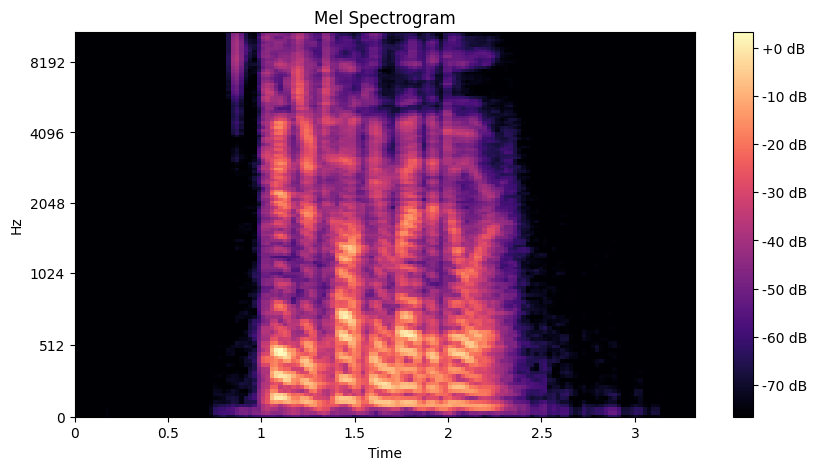

In [122]:
import matplotlib.pyplot as plt
import librosa.display

# Rest of your code...

plt.figure(figsize=(10, 5))
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()



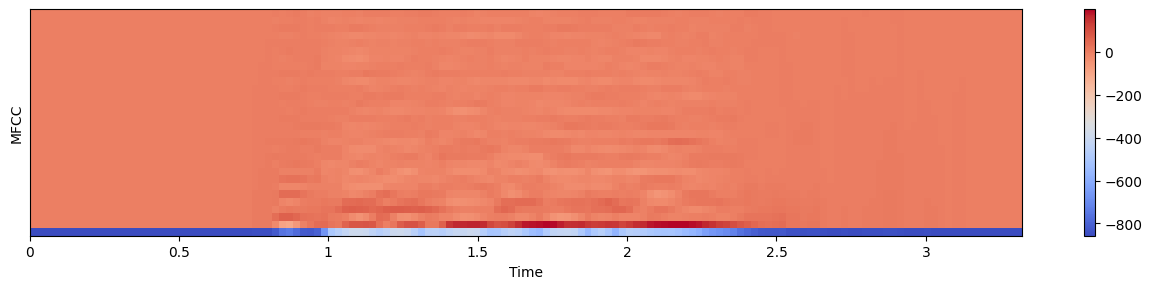

In [124]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

**DATA AUGMENTATION**

In [125]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

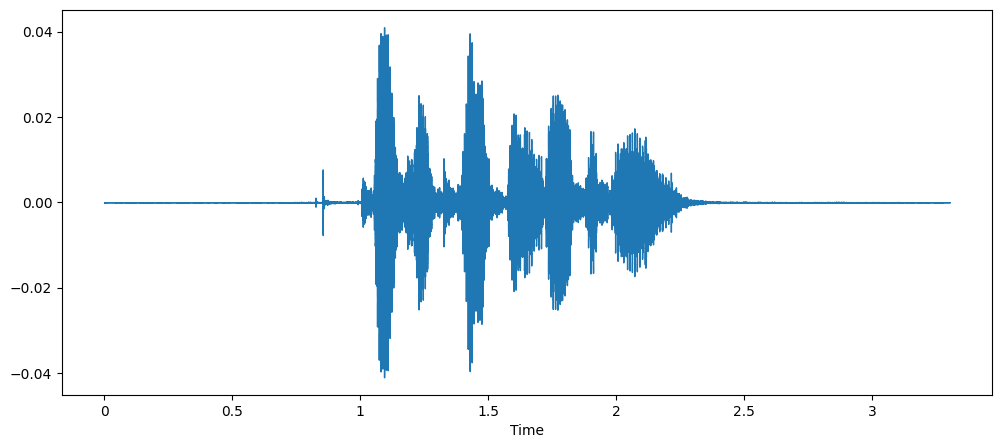

In [126]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

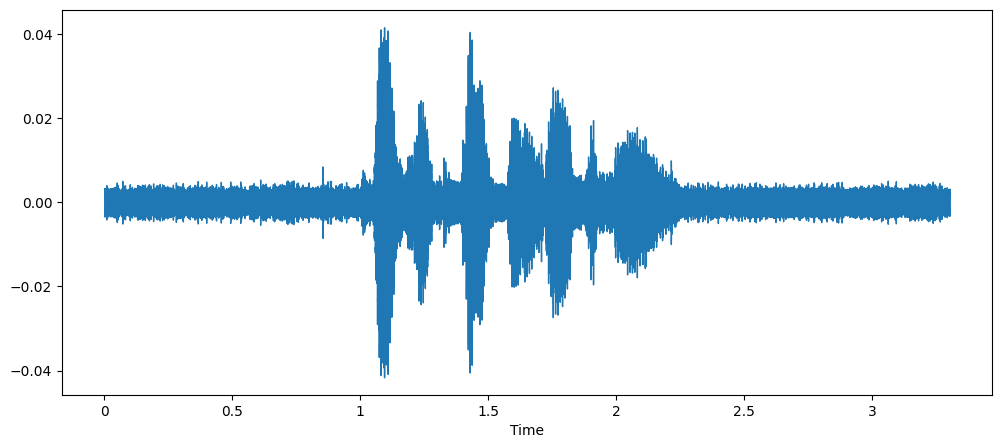

In [127]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

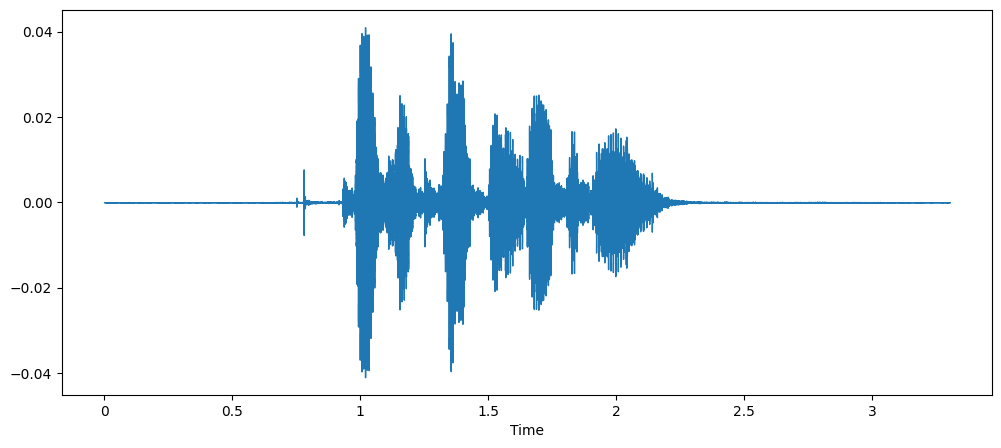

In [128]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

**FEATURE EXTRACTION**

In [129]:
import numpy as np
import librosa
import librosa.display
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_result = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_result.T) if not flatten else np.ravel(mfcc_result.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [130]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


**GET FEATURES**

In [131]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:01,  1.24s/it]

0 audio has been processed


501it [04:38,  1.91it/s]

500 audio has been processed


1001it [09:31,  1.95it/s]

1000 audio has been processed


1440it [13:33,  1.77it/s]

Done
Time:  813.6223004509993


In [132]:
len(X), len(Y), data_path.Path.shape

(5760, 5760, (1440,))

**Saving features**

In [133]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.363770,0.469238,0.547852,0.385742,0.260742,0.210938,0.212891,0.334473,0.424316,0.520508,...,-25.478069,-5.514334,-4.621994,-16.895332,-17.484329,-8.712850,13.728486,-2.792683,-0.497854,disgust
1,0.252441,0.379883,0.508789,0.500977,0.495117,0.495117,0.493164,0.497559,0.494141,0.497070,...,-9.908466,-9.948461,-4.498417,-11.149247,-16.007422,-4.199955,6.756337,5.633102,0.885067,disgust
2,0.092285,0.110352,0.134766,0.100586,0.116699,0.132324,0.155762,0.169434,0.188965,0.210449,...,-24.086868,6.432701,-3.124088,-15.485006,-17.912476,2.240345,12.149171,-6.293523,-7.676951,disgust
3,0.256348,0.378906,0.501953,0.500977,0.495117,0.504883,0.517578,0.509766,0.513184,0.503906,...,-4.689820,-0.440622,-2.000312,-9.269364,-6.554426,-3.362354,5.535048,4.591084,-8.259503,disgust
4,0.142090,0.244629,0.323242,0.377441,0.424316,0.415527,0.339844,0.193359,0.097168,0.003906,...,12.576056,11.874103,4.633615,0.883542,5.766344,2.494705,5.918945,2.206204,5.541618,neutral


**Data Visualisation and Exploration**

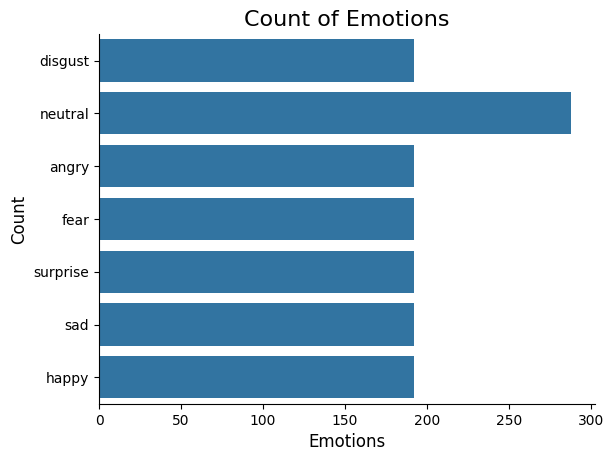

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_path is your DataFrame containing emotions
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
